In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
re_link = re.compile(r"(https?:?\/\/)?(www[1-3]?.?)?((([a-zA-Z0-9\-]*)\.?)*)")

In [3]:
def unique_words(s):
    unique = set(s.split(' ')) 
    return len(unique)

def emojis(post):
    # does not include emojis made purely from symbols, only :word:
    emoji_count = 0
    words = post.split()
    for e in words:
        if 'http' not in e:
            if e.count(':')==2:
                emoji_count+=1
    return emoji_count

def colons(post):
    # Includes colons used in emojis
    colon_count = 0
    words = post.split()
    for e in words:
        if 'http' not in e:
            colon_count+=e.count(':')
    return colon_count

# def domains(post):
#     # Includes colons used in emojis
#     domains = []
#     words = post.split(' ')
#     for s in words:
# #         print(s)
#         if 'http' in s:
#             s1 = s.split('.com')[0].split('//')[-1]
#             s2 = s1[s1.rfind('.')+1:]
#             if s2 not in domains:
#                 domains.append(s2)
#     return domains

In [4]:
#Pull in csv
mbti_user = pd.read_csv('../data/mbti_1.csv')
#.reset_index().rename(columns={'index':'id'})

Analysis per user

Analysis per post

In [5]:
posts = mbti_user.apply(lambda x: pd.Series(x['posts'].split('|||')), axis=1).stack().reset_index(level=1, drop=True)
posts.name = 'post'
mbti_post = mbti_user[['type']].join(posts)
mbti_post['post'] = pd.Series(mbti_post['post'], dtype=object)
mbti_post = mbti_post.reset_index().rename(columns={'index':'id'})

In [6]:
#replace links with domains
mbti_post['clean_post'] = mbti_post['post'].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+).*"),
    lambda match: match.group(2)
    )

In [7]:
#looking at words
mbti_post['unique_words'] = mbti_post['clean_post'].apply(unique_words)
mbti_post['word_count'] = mbti_post['clean_post'].apply(lambda s : s.count(' ')+1)

In [8]:
#looking at links
mbti_post['link_count'] = mbti_post['post'].apply(lambda s : s.count('http'))
mbti_post['youtube_link'] = mbti_post['post'].apply(lambda s : s.count('youtube') + s.count('youtu.be'))

In [9]:
#Some grammer counts
mbti_post['char_count'] = mbti_post['clean_post'].apply(len)
mbti_post['qm'] = mbti_post['clean_post'].apply(lambda s : s.count('?'))
mbti_post['em'] = mbti_post['clean_post'].apply(lambda s : s.count('!'))
mbti_post['colons'] = mbti_post['clean_post'].apply(colons)
mbti_post['emojis'] = mbti_post['clean_post'].apply(emojis)

In [10]:
#splitting out the different personality elements
mbti_post['extroverted'] = mbti_post['type'].apply(lambda s : 1 if s[0] == 'E' else 0)
mbti_post['sensor'] = mbti_post['type'].apply(lambda s : 1 if s[1] == 'S' else 0)
mbti_post['thinker'] = mbti_post['type'].apply(lambda s : 1 if s[2] == 'T' else 0)
mbti_post['judger'] = mbti_post['type'].apply(lambda s : 1 if s[3] == 'J' else 0)

In [11]:
mbti_post.head()

,id,type,post,clean_post,unique_words,word_count,link_count,youtube_link,char_count,qm,em,colons,emojis,extroverted,sensor,thinker,judger
0,0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,'youtube,1,1,1,1,8,0,0,0,0,0,0,0,1
1,0,INFJ,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,1,1,1,1,0,1,0,0,0,0,0,0,0,1
2,0,INFJ,enfp and intj moments https://www.youtube.com...,enfp and intj moments youtube,6,6,2,2,30,0,0,0,0,0,0,0,1
3,0,INFJ,What has been the most life-changing experienc...,What has been the most life-changing experienc...,10,10,0,0,61,1,0,0,0,0,0,0,1
4,0,INFJ,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,youtube,1,1,2,2,7,0,0,0,0,0,0,0,1


Reducing dataset

In [12]:
len(mbti_post[mbti_post['word_count']<=1])

23784

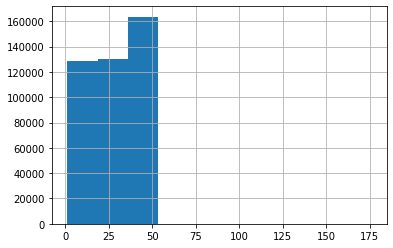

In [13]:
mbti_post['word_count'].hist()

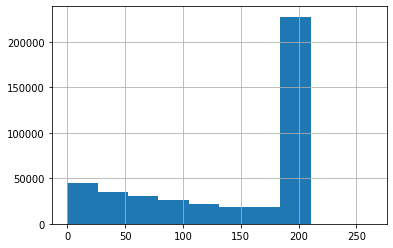

In [14]:
mbti_post['char_count'].hist()

Exporting final dataset to csv